<a href="https://colab.research.google.com/github/prahee/problem-set-zero/blob/main/PS0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

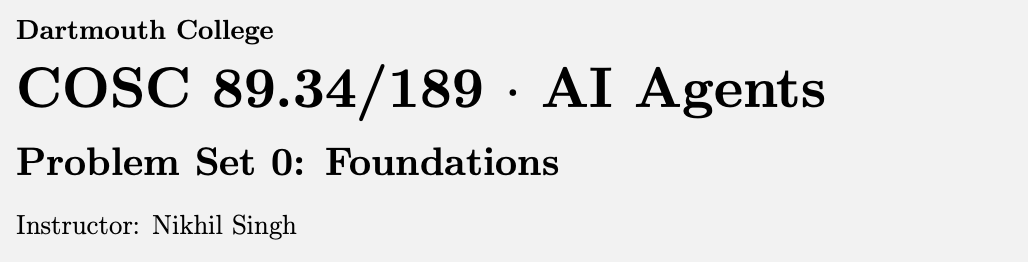

<div style="text-align: left; font-size: 13px; line-height: 1.5; font-family: 'Times New Roman';">

<strong>Rahee Sikder</strong><br>
promita.rahee.sikder.28@dartmouth.edu<br>
COSC 89.34/189: AI Agents<br>
Winter 2026

</div>

<div style="width: 100%; display: flex; justify-content: center;">

<table style="
    min-width: 1000px;
    border-collapse: collapse;
    font-family: 'Times New Roman', serif;
    font-size: 16px;
">
  <tr style="background:#f5f5f5; border-bottom: 1px solid #ccc;">
    <th style="text-align: left; padding: 10px;">Section</th>
    <th style="text-align: left; padding: 10px;">Description</th>
  </tr>

  <tr style="border-bottom: 1px solid #eee;">
    <td style="padding: 10px; font-weight: bold;">Part 1</td>
    <td style="padding: 10px;">MCQ (Multiple Choice Questions)</td>
  </tr>

  <tr style="border-bottom: 1px solid #eee;">
    <td style="padding: 10px; font-weight: bold;">Part 2</td>
    <td style="padding: 10px;">Short Answer Questions</td>
  </tr>

  <tr style="border-bottom: 1px solid #eee;">
    <td style="padding: 10px; font-weight: bold;">Part 3.1</td>
    <td style="padding: 10px;">Representational Power of Untrained Convolutional Networks</td>
  </tr>

  <tr style="border-bottom: 1px solid #eee;">
    <td style="padding: 10px; font-weight: bold;">Part 3.2</td>
    <td style="padding: 10px;">Decoder only Transformer for Character level Text Generation</td>
  </tr>

  <tr style="border-bottom: 1px solid #eee;">
    <td style="padding: 10px; font-weight: bold;">Part 3.3</td>
    <td style="padding: 10px;">Byte Pair Encoding (BPE) Algorithm</td>
  </tr>

  <tr>
    <td style="padding: 10px; font-weight: bold;">References</td>
    <td style="padding: 10px;">List of papers, links, and sources used</td>
  </tr>

</table>

</div>

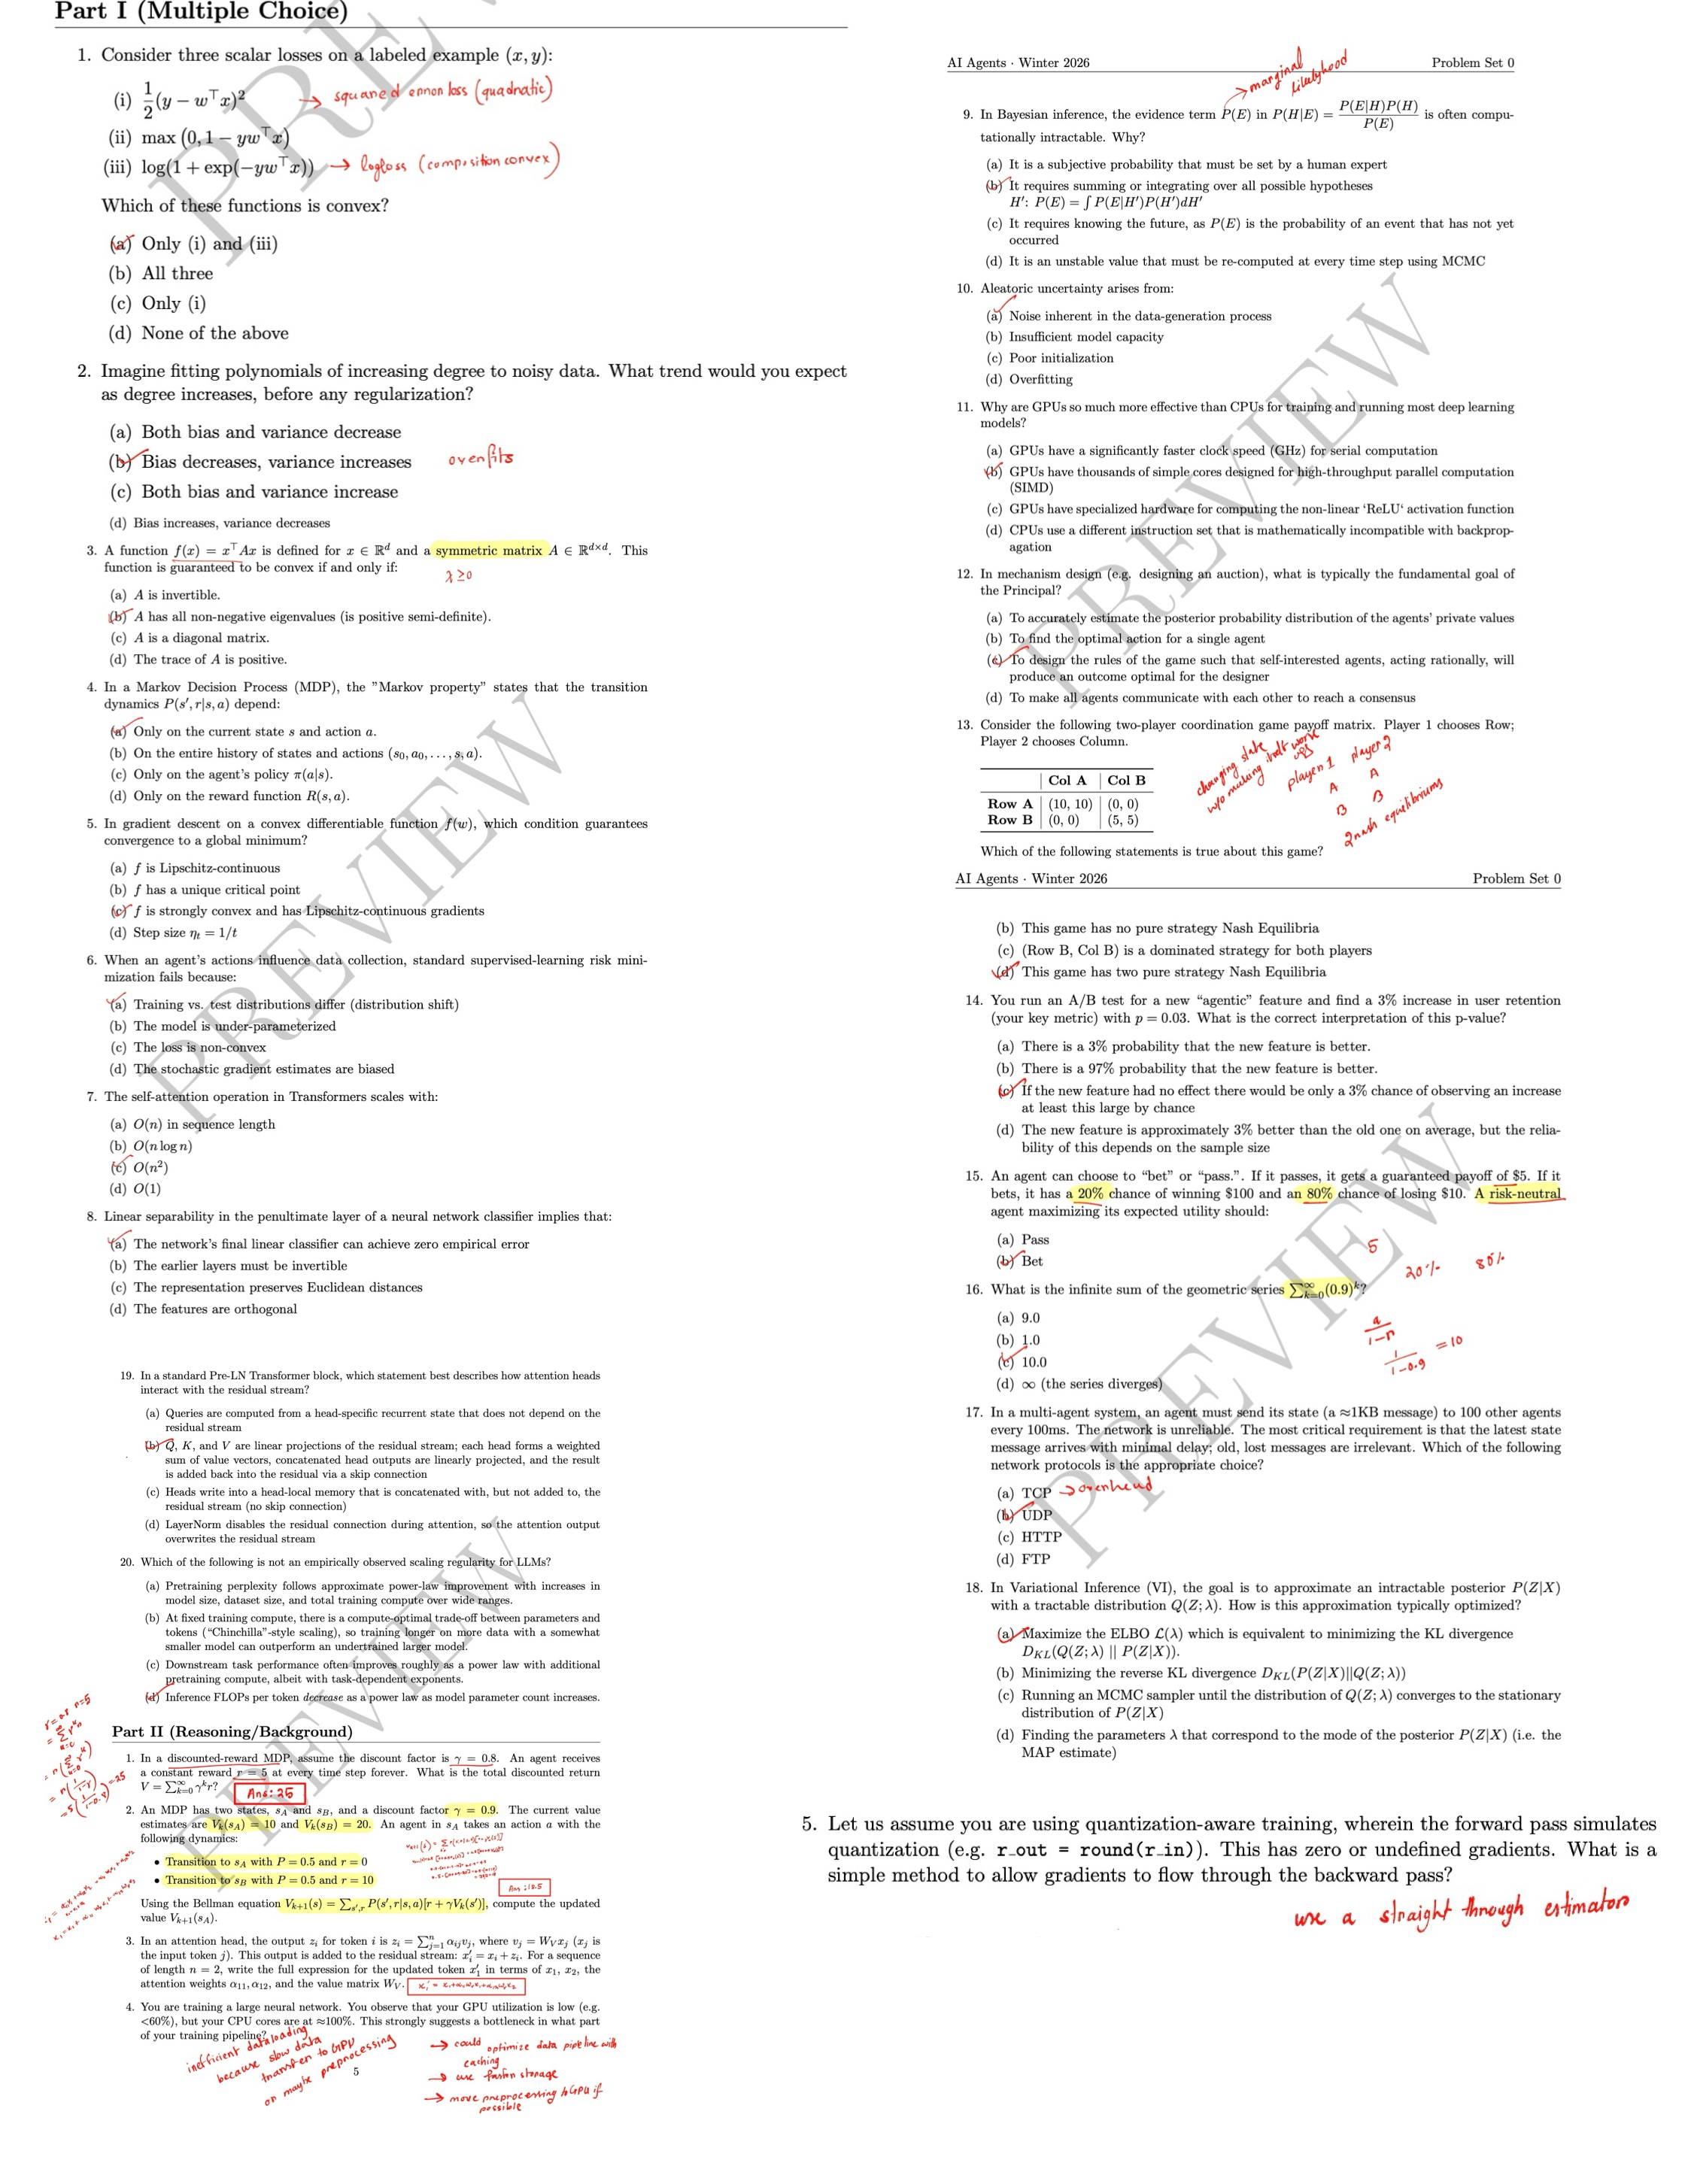

## Part I (MCQ)

$$
\begin{array}{|c|c|l|}
\hline
\textbf{No.} & \textbf{Option} & \textbf{Answer} \\ \hline
1 & (a) & \text{Only (i) and (iii)} \\ \hline
2 & (b) & \text{Bias decreases, variance increases} \\ \hline
3 & (b) & A \text{ has all non-negative eigenvalues (is PSD)} \\ \hline
4 & (a) & \text{Only on the current state } s \text{ and action } a \\ \hline
5 & (c) & f \text{ is strongly convex and has Lipschitz gradients} \\ \hline
6 & (a) & \text{Training vs. test distributions differ (distribution shift)} \\ \hline
7 & (c) & O(n^2) \\ \hline
8 & (a) & \text{The network’s final linear classifier can achieve zero error} \\ \hline
9 & (b) & \text{It requires summing/integrating over all possible hypotheses} \\ \hline
10 & (a) & \text{Noise inherent in the data-generation process} \\ \hline
11 & (b) & \text{GPUs have thousands of simple cores (SIMD)} \\ \hline
12 & (c) & \text{Mechanism design: self-interested agents act rationally} \\ \hline
13 & (d) & \text{This game has two pure strategy Nash Equilibria} \\ \hline
14 & (c) & \text{3% chance of observing increase by chance} \\ \hline
15 & (b) & \text{Bet} \\ \hline
16 & (c) & \frac{a}{1-r} = \frac{1}{1-0.9} = 10.0 \\ \hline
17 & (b) & \text{UDP} \\ \hline
18 & (a) & \text{Maximize ELBO } L(\lambda) \text{ to minimize KL divergence} \\ \hline
19 & (b) & \text{Q, K, V projections, weighted sums, and skip connections} \\ \hline
20 & (d) & \text{Inference FLOPs per token decrease as power law} \\ \hline
\end{array}
$$



## Part II (Short Answer Questions)


1. 25

2. Given, $V_k(s_A) = 10$, $V_k(s_B) = 20$, $\gamma = 0.9$,

    $s_A$ (with probability = 0.5), reward 0 and
    $s_B$ (with probability = 0.5), reward 10 combined = 18.5


3. Residual add:
    $x_1' = x_1 + z_1 = x_1 + \alpha_{11}v_1 + \alpha{12}v_2 = \alpha_{11}W_Vx_1 + \alpha_{12}W_Vx_2$

4. Could be inefficient data loading because slow data
    - transfer to GPU
    - could optimize data pipeline caching
    - more preprocessing to GPU if possible

5. Use a straight through estimator here.

## Part III


### Question 1: Representational Power of Untrained Convolutional Networks

In [36]:
import numpy as np
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# CNN w/ 2 hidden layers and 1 output (128 unit linear) layer
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # conv Layer 1 (16 filters, 3x3 kernel)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # 28x28 -> 14x14

        # conv Layer 2 (32 filters, 3x3 kernel)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # 14x14 -> 7x7

        self.fc = nn.Linear(32 * 7 * 7, 128) # fully connected layer (128 units)

    # forward pass to extract features
    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)  # final layer activations ("random features")
        return x


def load_mnist():
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1000, shuffle=False)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

    return train_loader, test_loader

# extract features from the last layer of the untrained network
def extract_features(model, data_loader, device):
    model.eval()
    features_list = []
    labels_list = []

    with torch.no_grad():
        for data, labels in data_loader:
            data = data.to(device)
            features = model(data)
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())

    features = np.vstack(features_list)
    labels = np.concatenate(labels_list)

    return features, labels


def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # setup device

    train_loader, test_loader = load_mnist() # load MNIST
    print(f"Training samples: {len(train_loader.dataset)}")
    print(f"Test samples: {len(test_loader.dataset)}\n")

    # initialize untrained CNN
    model = SimpleCNN().to(device)
    print(f"Model architecture:\n{model}\n")

    # verify that the weights are random
    conv1_weights = model.conv1.weight.data.cpu().numpy()
    print(f"Conv1 weight statistics (random initialization):")
    print(f"Mean: {conv1_weights.mean():.6f}")
    print(f"Std: {conv1_weights.std():.6f}")
    print(f"Min: {conv1_weights.min():.6f}")
    print(f"Max: {conv1_weights.max():.6f}\n")

    # extract features from training set
    train_features, train_labels = extract_features(model, train_loader, device)
    print(f"Training features: {train_features.shape}")

    # extract features from test set
    test_features, test_labels = extract_features(model, test_loader, device)
    print(f"Test features: {test_features.shape}")

    # train SVM on the random features
    svm = SVC(kernel='linear', C=1.0, random_state=RANDOM_SEED, verbose=False)
    svm.fit(train_features, train_labels)

    # evaluate on test set
    test_predictions = svm.predict(test_features)
    test_accuracy = accuracy_score(test_labels, test_predictions)

    print("Evaluation Results:")
    print(f"Test Set Classification Accuracy: {test_accuracy * 100:.2f}%")
    print()

    # some additional analysis
    print("Feature Statistics:")
    print(f"Training features mean: {train_features.mean():.6f}")
    print(f"Training features std: {train_features.std():.6f}")
    print(f"Test features mean: {test_features.mean():.6f}")
    print(f"Test features std: {test_features.std():.6f}")

    # per-class accuracy
    print("Per-class accuracy:")
    for digit in range(10):
        digit_mask = test_labels == digit
        digit_acc = accuracy_score(test_labels[digit_mask], test_predictions[digit_mask])
        print(f"  Digit {digit}: {digit_acc * 100:.2f}%")


if __name__ == "__main__":
    main()

Training samples: 60000
Test samples: 10000

Model architecture:
SimpleCNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=1568, out_features=128, bias=True)
)

Conv1 weight statistics (random initialization):
Mean: -0.019589
Std: 0.197038
Min: -0.331387
Max: 0.333203

Training features: (60000, 128)
Test features: (10000, 128)
Evaluation Results:
Test Set Classification Accuracy: 95.74%

Feature Statistics:
Training features mean: 0.016243
Training features std: 0.157502
Test features mean: 0.016371
Test features std: 0.158413
Per-class accuracy:
  Digit 0: 99.08%
  Digit 1: 99.47%
  Digit 2: 94.96%
  Digit 3: 95.05%
  Digit 4: 95.93%
  Digit 5: 94.1

### Deliverables:
(a) The test accuracy is 95.74 percent. Per class performance was also strong (most classes in the mid nineties). The lowest accuracy was for digit 9 at 92.47%.

(b)

<div style="
    border: 1px solid #aaa;
    border-radius: 6px;
    padding: 12px;
    background: #f2f2f2;
    width: 90%;
    margin: 0 auto;
    font-family: 'Times New Roman', serif;
">

$$
\begin{aligned}
\text{Random Seed:} &\quad 42 \\
\text{Python Version:} &\quad 3.12.6\ \text{(macOS, Apple Silicon)} \\
\text{Required Packages:} &\quad \text{PyTorch, Torchvision, NumPy, scikit-learn}
\end{aligned}
$$

</div>



(c.i) The SVM reaches 95.74 percent accuracy even though the CNN was never trained. This is indeed very interesting because the model uses only random weights. The extracted 128 dimensional features are already structured enough that a linear classifier can draw good decision boundaries. The per class scores show similar strength for most digits as well.

(c.ii) Convolution gives the network a built-in sense of locality and structure, so even with random weights the filters end up behaving like a collection of edge and texture detectors at different positions and scales. The pooling layers smooth things out and give some stability to small shifts. Once we stack these pieces together, the image gets mapped into a multi level feature space where the digit classes sit farther apart. At that point a simple linear SVM can do a surprisingly good job!

(c.iii)
Work on random features and kernel approximations explains this situation. [Rahimi and Recht](https://people.eecs.berkeley.edu/~brecht/papers/07.rah.rec.nips.pdf) showed that random features can approximate kernels that make data linearly separable. Later work extended this idea to convolutional random features, which act as fixed feature maps capturing locality and compositional structure.

Neural tangent kernel theory suggests that very wide random networks behave like they are implementing a fixed deterministic kernel. In a convolutional model, that kernel naturally captures translation structure, which already gives a strong inductive bias before any training happens. People have also found that random CNNs tend to beat raw pixel baselines on a lot of classification tasks.


### 3.2 Decoder-only Transformer for character-level text generation

Here I implement a decoder-only Transformer for character-level language
modeling on Shakespeare's works. The transformer architecture from the paper [Attention is all you need](https://arxiv.org/pdf/1706.03762) (Vaswani et al., 2017) introduced a huge shift in sequence modeling by replacing recurrent layers with self-attention mechanisms, which enabled parallel processing and captured long-range dependencies more effectively. I adapt this architecture for autoregressive text
generation, and implement multi-head attention, positional encoding, and feed-forward networks.

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from collections import Counter

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [38]:
# data loading
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt -O shakespeare.txt

# check
!ls -lh shakespeare.txt
!head -20 shakespeare.txt

text = open("shakespeare.txt", "r", encoding="utf-8").read()
print(f"Total characters: {len(text):,}")
print(f"First 100 characters:\n{text[:100]}\n[End of first 100 characters]\n")

# character vocabulary
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(f"Unique characters (vocabulary size): {vocab_size}\n")

# character-to-index and index-to-character mappings
stoi = {ch: i for i, ch in enumerate(chars)}
itos = {i: ch for ch, i in stoi.items()}

# helper functions
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

# quick example test
print("Example encoding/decoding:")
test_str = "Question two"
encoded = encode(test_str)
decoded = decode(encoded)
print(f"Original: {test_str}")
print(f"Encoded: {encoded}")
print(f"Decoded: {decoded}\n")

# word-level statistics ~ approximate
words = text.split()
print(f"Approximate word count: {len(words):,}")
print(f"Average word length: {np.mean([len(w) for w in words]):.2f} characters")
print(f"Vocabulary size: {len(set(words)):,}\n")

# encode the dataset
data = torch.tensor(encode(text), dtype=torch.long)
print(f"Encoded data shape: {data.shape}")
print(f"Data type: {data.dtype}")
print(f"First 10 tokens: {data[:10].tolist()}\n")

--2025-12-17 23:29:58--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘shakespeare.txt’

shakespeare.txt     100%[===================>]   1.06M  --.-KB/s    in 0.008s  

2025-12-17 23:29:59 (132 MB/s) - ‘shakespeare.txt’ saved [1115394/1115394]

-rw-r--r-- 1 root root 1.1M Dec 17 23:29 shakespeare.txt
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at

Train and validation split

In [39]:
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

print(f"Training data: {len(train_data):,} characters ({len(train_data)/len(data)*100:.1f}%)")
print(f"Validation data: {len(val_data):,} characters ({len(val_data)/len(data)*100:.1f}%)")


Training data: 1,003,854 characters (90.0%)
Validation data: 111,540 characters (10.0%)


In [40]:
# sample sequences
block_size = 256  # Context length
batch_size = 64

#generate a small batch of data of inputs x and targets y
def get_batch_initial(split):
    data_split = train_data if split == 'train' else val_data
    ix = torch.randint(len(data_split) - block_size, (4,))
    x = torch.stack([data_split[i:i+block_size] for i in ix])
    y = torch.stack([data_split[i+1:i+block_size+1] for i in ix])
    return x, y

#get a sample batch
xb, yb = get_batch_initial('train')
print(f"Input batch shape: {xb.shape}  (batch_size=4, block_size={block_size})")
print(f"Target batch shape: {yb.shape}\n")

print("Sample sequence (first batch, first 80 tokens):")
print(f"Input:{decode(xb[0, :80].tolist())!r}")
print(f"Target:{decode(yb[0, :80].tolist())!r}")

# context-target pairs for understanding
print("first sequence, first 10 steps:")
for t in range(10):
    context = xb[0, :t+1]
    target = yb[0, t]
    print(f"  Context: {str(decode(context.tolist())):30s} --> Target: {itos[target.item()]!r}")

Input batch shape: torch.Size([4, 256])  (batch_size=4, block_size=256)
Target batch shape: torch.Size([4, 256])

Sample sequence (first batch, first 80 tokens):
Input:'pey the\nGreat. Pompey, you are partly a bawd, Pompey,\nhowsoever you colour it in'
Target:'ey the\nGreat. Pompey, you are partly a bawd, Pompey,\nhowsoever you colour it in '
first sequence, first 10 steps:
  Context: p                              --> Target: 'e'
  Context: pe                             --> Target: 'y'
  Context: pey                            --> Target: ' '
  Context: pey                            --> Target: 't'
  Context: pey t                          --> Target: 'h'
  Context: pey th                         --> Target: 'e'
  Context: pey the                        --> Target: '\n'
  Context: pey the
                       --> Target: 'G'
  Context: pey the
G                      --> Target: 'r'
  Context: pey the
Gr                     --> Target: 'e'


In [41]:
# model architecture
# hyperparameters
d_model = 384
num_heads = 6
num_layers = 6
d_ff = 4 * d_model  # 1536
dropout = 0.2
learning_rate = 3e-4
max_iters = 5000
eval_interval = 500
eval_iters = 200

device = 'cuda' if torch.cuda.is_available() else 'cpu' #T4 w/ google collab
print(f"Device: {device}\n")

print("Hyperparameters:")
print(f"-Vocabulary size: {vocab_size}")
print(f"-Model dimension (d_model): {d_model}")
print(f"-Number of attention heads: {num_heads}")
print(f"-Number of layers: {num_layers}")
print(f"-Feed-forward dimension (d_ff): {d_ff}")
print(f"-Context length (block_size): {block_size}")
print(f"-Dropout: {dropout}")
print(f"-Learning rate: {learning_rate}")
print(f"-Training iterations: {max_iters}")
print(f"-Batch size: {batch_size}")

Device: cuda

Hyperparameters:
-Vocabulary size: 65
-Model dimension (d_model): 384
-Number of attention heads: 6
-Number of layers: 6
-Feed-forward dimension (d_ff): 1536
-Context length (block_size): 256
-Dropout: 0.2
-Learning rate: 0.0003
-Training iterations: 5000
-Batch size: 64


This is the multi head self attention module and it implements:

$$
\text{Attention}(Q, K, V)
= \mathrm{softmax}\left( \frac{QK^{\top}}{\sqrt{d_k}} \right) V
$$

This module splits the input into multiple attention heads, which allows the model to attend to information from different representation subspaces.

In [42]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads  # dimension per head

        # linear projections for Q, K, V (using only framework primitives)
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

        self.dropout = nn.Dropout(dropout)

        # register causal mask as a buffer (not a parameter)
        self.register_buffer(
            "causal_mask",
            torch.tril(torch.ones(block_size, block_size)).view(1, 1, block_size, block_size)
        )

    def forward(self, x):
        B, T, C = x.shape  # batch size, sequence length, d_model

        # linear projections and reshape for multi-head attention
        Q = self.W_q(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        K = self.W_k(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)
        V = self.W_v(x).view(B, T, self.num_heads, self.d_k).transpose(1, 2)

        # scaled dot-product attention; scores = QK^T / sqrt(d_k)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)

        # causal mask (prevent attending to future tokens; important for autoregressive generation)
        scores = scores.masked_fill(self.causal_mask[:, :, :T, :T] == 0, float('-inf'))

        # softmax to get attention weights
        attn_weights = F.softmax(scores, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # apply attention to values
        out = torch.matmul(attn_weights, V)

        out = out.transpose(1, 2).contiguous().view(B, T, C)
        out = self.W_o(out)

        return out

The cell below is for position wise feed forward network with ReLU activation (applied to each position separately and identically):

$$
\text{FFN}(x) = \text{ReLU}(x W_1 + b_1) W_2 + b_2
$$


In [43]:
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model),
            nn.Dropout(dropout)
        )
    def forward(self, x):
        return self.net(x)

The next cell defines a Transformer decoder block. This block combines multi head self attention with a position wise feed forward network. It follows two residual paths:
1. Input → LayerNorm → MultiHeadAttention → Dropout → Add residual  
2. Input → LayerNorm → FeedForward → Dropout → Add residual

In [44]:
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.feed_forward = FeedForward(d_model, d_ff, dropout)

        # Layer normalization (using framework primitive: nn.LayerNorm)
        self.ln1 = nn.LayerNorm(d_model)
        self.ln2 = nn.LayerNorm(d_model)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        # Pre-LN: LayerNorm -> Attention -> Residual connection
        x = x + self.dropout(self.attention(self.ln1(x)))

        # Pre-LN: LayerNorm -> FFN -> Residual connection
        x = x + self.dropout(self.feed_forward(self.ln2(x)))

        return x

The next cell defines the sinusoidal positional encoding module. This component injects information about token positions into the model so the transformer can reason about order, since attention alone has no sense of sequence structure

The encoding uses fixed sine and cosine functions:

$$
\text{PE}(pos, 2i) = \sin\left(\frac{pos}{10000^{2i / d_{\text{model}}}}\right)
$$

$$
\text{PE}(pos, 2i + 1) = \cos\left(\frac{pos}{10000^{2i / d_{\text{model}}}}\right)
$$

In [45]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(dropout)

        # positional encodings once in log space
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        pe = pe.unsqueeze(0)  # batch dimension: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return self.dropout(x)

Now I will define the complete decoder only Transformer used for character level language modeling. The model takes sequences of character indices and predicts the next character at each position.

The architecture has five main parts:

    i.      A learnable character embedding that maps each token to a vector representation.  
    ii.     A sinusoidal positional encoding that injects information about the order of tokens.  
    iii.    A stack of Transformer blocks that apply self attention and feed forward transformations.  
    iv.     A final layer normalization step that stabilizes the output before prediction.  
    v.      A linear projection that maps hidden states to vocabulary logits.

In [46]:
class CharacterTransformer(nn.Module):
    def __init__(self, vocab_size, d_model, num_heads, num_layers, d_ff, block_size, dropout=0.1):
        super().__init__()

        # character embedding layer (using framework primitive: nn.Embedding)
        self.token_embedding = nn.Embedding(vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, block_size, dropout)

        self.blocks = nn.Sequential(*[ # stack of Transformer blocks
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

        self.ln_f = nn.LayerNorm(d_model)  # final layer normalization

        # output projection to vocabulary (language modeling head)
        self.lm_head = nn.Linear(d_model, vocab_size)

        # share weights between embedding and output projection
        self.lm_head.weight = self.token_embedding.weight
        self.apply(self._init_weights) # initialize all weights

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        B, T = idx.shape

        # token embeddings + positional encoding
        tok_emb = self.token_embedding(idx)  # (B, T, d_model)
        x = self.positional_encoding(tok_emb)

        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)  # (B, T, vocab_size)
        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits_flat = logits.view(B*T, C)
            targets_flat = targets.view(B*T)
            loss = F.cross_entropy(logits_flat, targets_flat)

        return logits, loss

    #generate new tokens autoregressively
    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):

        for _ in range(max_new_tokens):
            idx_cond = idx if idx.size(1) <= block_size else idx[:, -block_size:]

            logits, _ = self(idx_cond)
            logits = logits[:, -1, :] / temperature  #focus on last time step & scale by temperature

            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = float('-inf')

            #logits to probabilities
            probs = F.softmax(logits, dim=-1)

            idx_next = torch.multinomial(probs, num_samples=1)

            idx = torch.cat((idx, idx_next), dim=1)

        return idx

In [47]:
# model instantiation
model = CharacterTransformer(
    vocab_size=vocab_size,
    d_model=d_model,
    num_heads=num_heads,
    num_layers=num_layers,
    d_ff=d_ff,
    block_size=block_size,
    dropout=dropout
)
model = model.to(device)

# count parameters
num_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {num_params:,}")

Total parameters: 10,672,577


In [48]:
# training utilities and loop
def get_batch(split):
    data_split = train_data if split == 'train' else val_data
    ix = torch.randint(len(data_split) - block_size, (batch_size,))
    x = torch.stack([data_split[i:i+block_size] for i in ix])
    y = torch.stack([data_split[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss(model):
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

print("Optimizer: AdamW")
print(f"Learning rate: {learning_rate}\n")

train_losses = []
val_losses = []
iterations = []

model.train()
for iter in range(max_iters):

    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss(model)
        print(f"Step {iter:5d}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

        train_losses.append(losses['train'])
        val_losses.append(losses['val'])
        iterations.append(iter)

    xb, yb = get_batch('train')
    logits, loss = model(xb, yb)

    #backpropagation
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

Optimizer: AdamW
Learning rate: 0.0003

Step     0: train loss 4.2939, val loss 4.2886
Step   500: train loss 2.4495, val loss 2.4475
Step  1000: train loss 1.8955, val loss 1.9768
Step  1500: train loss 1.6118, val loss 1.7909
Step  2000: train loss 1.4734, val loss 1.6800
Step  2500: train loss 1.3942, val loss 1.6086
Step  3000: train loss 1.3372, val loss 1.5601
Step  3500: train loss 1.2978, val loss 1.5412
Step  4000: train loss 1.2650, val loss 1.5230
Step  4500: train loss 1.2394, val loss 1.5170
Step  4999: train loss 1.2157, val loss 1.4901


As we can see from the output, loss is decreasing steadily and train / val loss were relatively close (not overfitting)



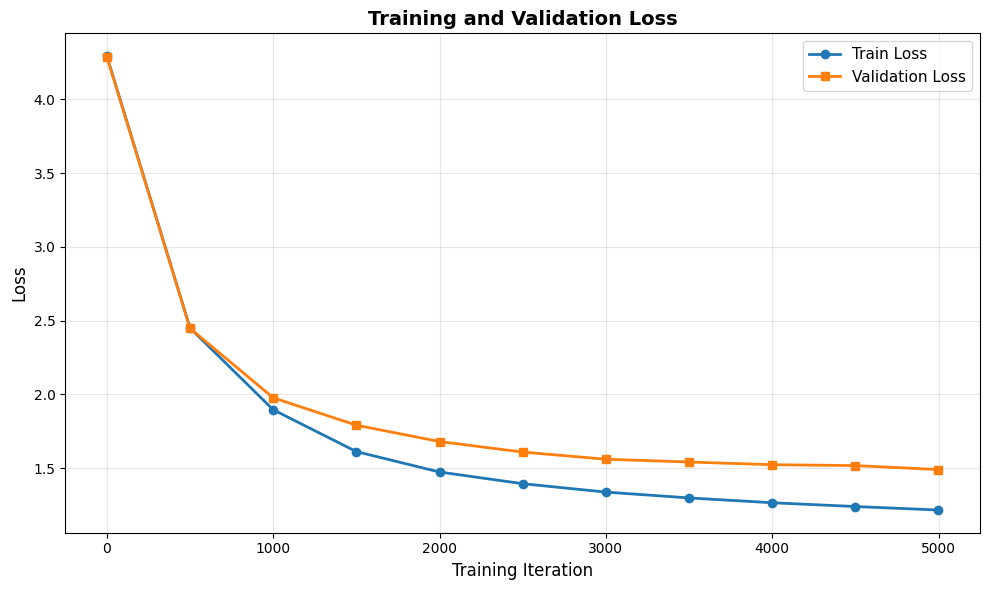

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
# visualize and save the model
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_losses, label='Train Loss', marker='o', linewidth=2)
plt.plot(iterations, val_losses, label='Validation Loss', marker='s', linewidth=2)
plt.xlabel('Training Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Save model checkpoint
torch.save({
    'model_state_dict': model.state_dict(),
    'stoi': stoi,
    'itos': itos,
    'vocab_size': vocab_size,
    'hyperparameters': {
        'd_model': d_model,
        'num_heads': num_heads,
        'num_layers': num_layers,
        'd_ff': d_ff,
        'block_size': block_size,
        'dropout': dropout,
    }
}, 'shakespeare_model.pt')

# download files
from google.colab import files
files.download('training_curves.png')
files.download('shakespeare_model.pt')


In [50]:
# generate text samples w/ different temperatures
model.eval()

prompts = [
    "JULIET:",
    "ROMEO:",
    "HAMLET:",
    "First Citizen:"
]

# test different temperatures to show variety (the less the temp, the predictable it is)
temperatures = {
    'conservative': 0.6,
    'balanced': 0.8,
    'creative': 1.0
}

# multiple samples per prompt (show variety)

print("Comparing creativity levels")

sample_prompt = "JULIET:"
print(f"\nPrompt: '{sample_prompt}'")
print("Generating 3 samples at different temperature settings:\n")

for temp_name, temp_val in temperatures.items():
    print(f"Temperature: {temp_val} ({temp_name.upper()})")

    context = torch.tensor([encode(sample_prompt)], dtype=torch.long, device=device)
    generated = model.generate(context, max_new_tokens=300, temperature=temp_val, top_k=50)
    output = decode(generated[0].tolist())

    print(output)

# best samples for each character (for your report)
print("Best samples(Temperature = 0.8)")

for i, prompt in enumerate(prompts, 1):
    print(f"SAMPLE {i}/{len(prompts)}: {prompt.strip(':')}")

    context = torch.tensor([encode(prompt)], dtype=torch.long, device=device)
    generated = model.generate(context, max_new_tokens=400, temperature=0.8, top_k=50)
    output = decode(generated[0].tolist())

    lines = output.split('\n')
    for line in lines[:20]:
        print(line)

    if len(lines) > 20:
        print(f"\n... andd({len(lines) - 20} more lines)")
    print()


#save to file (generated_shakespeare_samples.txt)

with open('generated_shakespeare_samples.txt', 'w', encoding='utf-8') as f:
    f.write("Shakespeare text generation samples\n")
    f.write("Decoder-Only Transformer: Character-Level Language Model\n")


    f.write("Model Hyperparameters:\n")
    f.write(f"1. Vocabulary size: {vocab_size}\n")
    f.write(f"2. Model dimension: {d_model}\n")
    f.write(f"3. Number of heads: {num_heads}\n")
    f.write(f"4. Number of layers: {num_layers}\n")
    f.write(f"5. Total parameters: {sum(p.numel() for p in model.parameters()):,}\n")
    f.write(f"6. Training iterations: {max_iters}\n")
    f.write(f"7. Final training loss: {train_losses[-1]:.4f}\n")
    f.write(f"8. Final validation loss: {val_losses[-1]:.4f}\n\n")


    for i, prompt in enumerate(prompts, 1):
        f.write(f"\nSample {i}: {prompt.strip(':')}\n")

        context = torch.tensor([encode(prompt)], dtype=torch.long, device=device)
        generated = model.generate(context, max_new_tokens=400, temperature=0.8, top_k=50)
        output = decode(generated[0].tolist())

        f.write(output)


from google.colab import files
files.download('generated_shakespeare_samples.txt')

Comparing creativity levels

Prompt: 'JULIET:'
Generating 3 samples at different temperature settings:

Temperature: 0.6 (CONSERVATIVE)
JULIET:
Now much some treasons are my point for it.

ROMEO:
Ay, my lord, I have thee to bear the mitter
To speak them to the body.

MERCUTIO:
So hath the grown of the prince is to-morrow.

ROMEO:
A gravant:
That little on the prince to me not,
So did so shall be so much for what shall have so.

ROMEO:
In a
Temperature: 0.8 (BALANCED)
JULIET:
Go to the duke is that makes thee in the field,
The greater of your uncle free and me with them,
Nothing shall prove itself that they will from her through,
To broad the devil be known to be so.
They are but with a senseless that man bitter
More to our promise than you father.

Shepherd:
But not go
Temperature: 1.0 (CREATIVE)
JULIET:
He's not this answered like to your soul.

Second Murderer:
This fair barbard words.
Farewell: away! i good father; if it shall be
use this downright called on mis-deliver'd
place will

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now I will provide two utility functions to re run the entire training process from scratch and to use pretrained model and generate text

In [51]:
def run_from_scratch():
    print("Just rerun all the training cells above to train a new model")
    return model


def run_pretrained(model_path='shakespeare_model.pt'):

    checkpoint = torch.load(model_path, map_location=device)

    # recreate model with saved hyperparameters
    hp = checkpoint['hyperparameters']
    loaded_model = CharacterTransformer(
        vocab_size=checkpoint['vocab_size'],
        d_model=hp['d_model'],
        num_heads=hp['num_heads'],
        num_layers=hp['num_layers'],
        d_ff=hp['d_ff'],
        block_size=hp['block_size'],
        dropout=hp['dropout']
    )

    loaded_model.load_state_dict(checkpoint['model_state_dict'])
    loaded_model = loaded_model.to(device)
    loaded_model.eval()


    # recreate encoding/decoding functions (from saved mappings)
    stoi_loaded = checkpoint['stoi']
    itos_loaded = checkpoint['itos']
    encode_loaded = lambda s: [stoi_loaded[c] for c in s]
    decode_loaded = lambda l: ''.join([itos_loaded[i] for i in l])

    # sample text generation
    prompt = "JULIET:"
    context = torch.tensor([encode_loaded(prompt)], dtype=torch.long, device=device)
    generated = loaded_model.generate(context, max_new_tokens=300, temperature=0.8, top_k=50)
    output = decode_loaded(generated[0].tolist())

    print(output)
    return loaded_model

**Note:** To use the pretrained model later, run:

> model = run_pretrained('shakespeare_model.pt')





### Deliverables:
**(a) After training, show 10-15 lines of text generated (sampled) from your model by providing it with a brief prompt (e.g. "JULIET:").**
<div style="
    border: 1px solid #ccc;
    border-radius: 6px;
    padding: 14px;
    background: #fafafa;
    font-family: 'Times New Roman', serif;
    font-size: 16px;
    line-height: 1.4;
    width: 100%;
">

<p>Sample 1 with the prompt "JULIET:"</p>

<pre style="
    margin-top: 10px;
    white-space: pre-wrap;
    font-family: 'Courier New', monospace;
    font-size: 15px;
">
JULIET:
What may to the cause?

CORIOLANUS:
How!

MENENIUS:
One hold!

CORIOLANUS:
Come, with me.

CORIOLANUS:
What is my Humbly day my back?

CORIOLANUS:
Why, were you content: I'll be true thee, if any so more to be more
To take thee for the earth, and 'tis too doom.
</pre>

</div>


**(b) Supply your full code, packaged with everything**

See the cells above

### 3.3 Byte Pair Encoding (BPE) algorithm

A from-scratch implementation of the BPE algorithm for subword tokenization.
The core BPE concepts are as follows:


$$
\begin{array}{|c|l|}
\hline
\textbf{Step} & \textbf{Process} \\ \hline
1 & \text{Counting character frequencies} \\ \hline
2 & \text{Finding most frequent adjacent pairs} \\ \hline
3 & \text{Merging pairs into new tokens} \\ \hline
4 & \text{Building a vocabulary through iterative merging} \\ \hline
5 & \text{Encoding new text with the learned vocabulary} \\ \hline
\end{array}
$$

In [52]:
def count_char_freq(corpus):
    char_freq = {}
    for char in corpus:
        char_freq[char] = char_freq.get(char, 0) + 1
    return char_freq

def get_adjacent_pairs(corpus):
    pairs = []
    for i in range(len(corpus) - 1):
        pairs.append((corpus[i], corpus[i + 1]))
    return pairs

def count_pair_freq(corpus):
    pair_freq = {}
    pairs = get_adjacent_pairs(corpus)
    for pair in pairs:
        pair_freq[pair] = pair_freq.get(pair, 0) + 1
    return pair_freq

def find_most_frequent_pair(pair_freq):
    if not pair_freq:
        return None
    return max(pair_freq.items(), key=lambda x: x[1])[0]

def create_new_token(pair):
    return pair[0] + pair[1]

def add_to_vocabulary(vocab, pair):
    new_token = create_new_token(pair)
    vocab.append(new_token)
    return vocab

# re-tokenize the corpus
def replace_pair_in_corpus(corpus, pair, new_token):
    result = []
    i = 0
    while i < len(corpus):
        # check if current and next token match the pair
        if i < len(corpus) - 1 and corpus[i] == pair[0] and corpus[i + 1] == pair[1]:
            result.append(new_token)
            i += 2  # skip both
        else:
            result.append(corpus[i])
            i += 1
    return result

#run the merge loop for k iterations
def merge_loop(corpus, k=1000):
    vocab = list(set(corpus))
    current_corpus = list(corpus)
    merge_rules = []

    for iteration in range(k):
        pair_freq = count_pair_freq(current_corpus)

        if not pair_freq:
            print(f"No more pairs to merge at iteration {iteration + 1}")
            break

        most_frequent = find_most_frequent_pair(pair_freq)
        freq = pair_freq[most_frequent]

        # skip if frequency is only 1 (because then there is no compression benefit, really)
        if freq == 1:
            print(f"All remaining pairs have frequency 1. Stopping at iteration {iteration + 1}")
            break

        #create and add new token
        new_token = create_new_token(most_frequent)
        vocab = add_to_vocabulary(vocab, most_frequent)

        merge_rules.append((most_frequent, new_token, freq))

        # replace all occurrences in corpus
        current_corpus = replace_pair_in_corpus(current_corpus, most_frequent, new_token)

        # show progress sometimes
        if (iteration + 1) % 10 == 0 or iteration < 10:
            print(f"Iteration {iteration + 1}: {most_frequent} -> '{new_token}' (freq: {freq})")

    print(f"\nNumber of merges: {len(merge_rules)} merges")
    return current_corpus, vocab, merge_rules

def train_tokenizer(corpus_path, k=100):
    with open(corpus_path, 'r', encoding='utf-8') as f:
        corpus = f.read()

    print(f"Corpus: {corpus_path}")
    print(f"Corpus size: {len(corpus)} characters")
    print(f"Unique characters: {len(set(corpus))}")
    print(f"Max iterations: {k}\n")

    final_corpus, vocabulary, merge_rules = merge_loop(corpus, k)

    print(f"Training Results:")
    print(f"Final vocabulary size: {len(vocabulary)}")
    print(f"Final corpus length: {len(final_corpus)} tokens")
    print(f"Compression ratio: {len(corpus) / len(final_corpus):.2f}x")

    return final_corpus, vocabulary, merge_rules

def encode_string(text, vocabulary):
    # vocab by length (longest first) for greedy matching
    sorted_vocab = sorted(vocabulary, key=len, reverse=True)

    tokens = []
    i = 0
    while i < len(text): # try to match longest possible token
        matched = False
        for token in sorted_vocab:
            if text[i:i+len(token)] == token:
                tokens.append(token)
                i += len(token)
                matched = True
                break

        if not matched: # not in vocabulary
            tokens.append(text[i])
            i += 1

    return tokens


def main():
    print("BPE algorithm demo: ")

    corpus_file = 'shakespeare.txt'
    k_iterations = 100

    final_corpus, vocabulary, merge_rules = train_tokenizer(corpus_file, k=k_iterations)

    # for question 1
    print("Merge rules learned:\n\nthe first 10 merge rules")

    for i, (pair, new_token, freq) in enumerate(merge_rules[:10], 1):
        p0 = repr(pair[0]) if pair[0] in ['\n', '\t', ' '] else pair[0]
        p1 = repr(pair[1]) if pair[1] in ['\n', '\t', ' '] else pair[1]
        print(f"  {i}. ({p0}, {p1}) -> '{new_token}' (freq: {freq})")

    if len(merge_rules) > 10:
        print(f"\n note: {len(merge_rules) - 20} rules omitted \n")
        print("Last 10 merge rules:")

        for i, (pair, new_token, freq) in enumerate(merge_rules[-10:], len(merge_rules) - 9):
            # Truncate long tokens
            p0 = repr(pair[0])[:20] if len(repr(pair[0])) > 20 else repr(pair[0])
            p1 = repr(pair[1])[:20] if len(repr(pair[1])) > 20 else repr(pair[1])
            new_tok = new_token[:20] + ___ if len(new_token) > 20 else new_token
            print(f"  {i}. ({p0}, {p1}) -> '{new_tok}' (freq: {freq})")
    # (b)
    print("Ecoding test string")

    test_string = "Alas, poor Yorick! I knew him"
    encoded_tokens = encode_string(test_string, vocabulary)

    print(f"\nOriginal string: '{test_string}'")
    print(f"Length: {len(test_string)} characters\n")
    print(f"Encoded tokens:")
    print(f" {encoded_tokens}")
    print(f"\nNumber of tokens: {len(encoded_tokens)}")
    print(f"Compression ratio: {len(test_string) / len(encoded_tokens):.2f}x")

if __name__ == "__main__":
    main()

BPE algorithm demo: 
Corpus: shakespeare.txt
Corpus size: 1115394 characters
Unique characters: 65
Max iterations: 100

Iteration 1: ('e', ' ') -> 'e ' (freq: 27643)
Iteration 2: ('t', 'h') -> 'th' (freq: 22739)
Iteration 3: ('t', ' ') -> 't ' (freq: 16508)
Iteration 4: ('s', ' ') -> 's ' (freq: 15364)
Iteration 5: ('d', ' ') -> 'd ' (freq: 14165)
Iteration 6: (',', ' ') -> ', ' (freq: 14098)
Iteration 7: ('o', 'u') -> 'ou' (freq: 12730)
Iteration 8: ('e', 'r') -> 'er' (freq: 11771)
Iteration 9: ('i', 'n') -> 'in' (freq: 10606)
Iteration 10: ('y', ' ') -> 'y ' (freq: 10283)
Iteration 20: ('l', 'l') -> 'll' (freq: 6357)
Iteration 30: ('o', 'w') -> 'ow' (freq: 3964)
Iteration 40: ('th', 'e ') -> 'the ' (freq: 2967)
Iteration 50: ('s', 'e') -> 'se' (freq: 2373)
Iteration 60: ('i', 'm') -> 'im' (freq: 2077)
Iteration 70: ("'", 's ') -> ''s ' (freq: 1767)
Iteration 80: ('r', 'i') -> 'ri' (freq: 1560)
Iteration 90: ('e', 's ') -> 'es ' (freq: 1385)
Iteration 100: ('f', 'a') -> 'fa' (freq: 12

### Deliverables:

**(a) Show the final merge rules your algorithm learned**

The BPE algorithm learned 100 merge rules from the Shakespeare corpus. Here are the fist ten rules (most frequent) and last ten rules (least frequent)

<div style="font-family: 'Times New Roman', serif; font-size: 16px; line-height: 1.35;">

<b>First 10 merge rules (most frequent):</b>

<pre style="font-family: 'Courier New', monospace; font-size: 15px; margin-left: 10px;">
1.  (e,  ' ')   ->  'e '    (freq: 27,643)
2.  (t,  h)     ->  'th'    (freq: 22,739)
3.  (t,  ' ')   ->  't '    (freq: 16,508)
4.  (s,  ' ')   ->  's '    (freq: 15,364)
5.  (d,  ' ')   ->  'd '    (freq: 14,165)
6.  (, , ' ')   ->  ', '    (freq: 14,098)
7.  (o,  u)     ->  'ou'    (freq: 12,730)
8.  (e,  r)     ->  'er'    (freq: 11,771)
9.  (i,  n)     ->  'in'    (freq: 10,606)
10. (y,  ' ')   ->  'y '    (freq: 10,283)
</pre>

<b>Last 10 merge rules (learned later):</b>

<pre style="font-family: 'Courier New', monospace; font-size: 15px; margin-left: 10px;">
91.  ('d', ', ')   ->  'd, '   (freq: 1,381)
92.  ('u', 'n')    ->  'un'    (freq: 1,374)
93.  ('E', 'N')    ->  'EN'    (freq: 1,373)
94.  ('k', 'e ')   ->  'ke '   (freq: 1,367)
95.  ('y', ', ')   ->  'y, '   (freq: 1,339)
96.  ('I', 'N')    ->  'IN'    (freq: 1,313)
97.  (' ', 'd')    ->  ' d'    (freq: 1,295)
98.  ('?', '\\n\\n')->  '?\n\n' (freq: 1,294)
99.  ('a', 's ')   ->  'as '   (freq: 1,294)
100. ('f', 'a')    ->  'fa'    (freq: 1,267)
</pre>

</div>

Its interesting to see how the  algorithm first learns common letter combinations ('th', 'er', 'in', 'ou') and spaces after frequent letters. Later merges capture less common patterns and character-level punctuation combinations here.

**(b) Show how your trained tokenizer encodes the string**

For the test string “Alas, poor Yorick! I knew him”, the character level version contains 29 characters, but after BPE encoding it compresses to 22 tokens. The compression ratio is about 1.32x, which is a 24 percent reduction. The tokenizer breaks the line into pieces like ['A', 'la', 's', ', ', 'p', 'oo', 'r', ' ', 'Y', 'or', 'i', 'c', 'k', '!', ' ', 'I ', 'k', 'n', 'e', 'w', ' h', 'im']. Most are created through learned merge rules, such as “la”, “oo”, “or”, “I ”, and “ h”. Some combine high frequency patterns, like the comma plus space rule, or “im”, which was one of the later merges.

**(c)** **Supply your full code, packaged with everything needed to run from scratch and reproduce your results. You should not need any external packages for this portion**

The code in the previous cell is fully self-contained, so to reproduce, run the cell above!

## References

$$
\begin{aligned}
\textbf{[1]} &\ \text{Rahimi, A., Recht, B.} \\
             &\ \textit{Random Features for Large-Scale Kernel Machines}. \\
             &\ \text{Advances in Neural Information Processing Systems (NIPS), 2007.} \\
\\
\textbf{[2]} &\ \text{Vaswani, A., Shazeer, N., Parmar, N., et al.} \\
             &\ \textit{Attention Is All You Need}. \\
             &\ \text{Neural Information Processing Systems (NIPS), 2017.} \\
\end{aligned}
$$